## 疫情数据爬取与可视化展示
    1. 疫情数据抓取
    2. 初步分析
    3. 数据处理
        3.1 国内各省疫情数据提取
        3.2 国际疫情数据提取
        3.3 数据整合
    4. 可视化展示
        4.1 国内疫情态势可视化
        4.2 国际疫情态势可视化
    5.词云图
        5.1 绘制国内词云图
        5.2 绘制全球词云图

In [28]:
#导入所需包
import time
import json
import requests
from datetime import datetime
import pandas as pd
import numpy as np
%pip install pyecharts

D:\App\Anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Note: you may need to restart the kernel to use updated packages.


In [2]:
#导入镜像
%pip install -i https://pypi.tuna.tsinghua.edu.cn/simple some-package

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simpleNote: you may need to restart the kernel to use updated packages.

  Created wheel for some-package: filename=some_package-0.1-py3-none-any.whl size=1447 sha256=3f06639190f620496263a0eb3380d3485ee1be35809fcea3c774deb380aefd5e
  Stored in directory: c:\users\bw\appdata\local\pip\cache\wheels\6c\4c\40\23255e2c09d2f0b1b219880055052bb65b621d895ef3a676f0
Successfully built some-package


### 一、疫情数据抓取

In [3]:
def Domestic():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5'
    reponse = requests.get(url=url).json()
    data = json.loads(reponse['data'])
    return data


def Oversea():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_foreign'
    reponse = requests.get(url=url).json()
    data = json.loads(reponse['data'])
    return data


domestic = Domestic()
oversea = Oversea()

#print(domestic)
print( ())
#print(domestic.values())
print(oversea.keys())


()
dict_keys(['foreignList', 'globalStatis', 'globalDailyHistory', 'importStatis', 'countryAddConfirmRankList', 'countryConfirmWeekCompareRankList', 'continentStatis'])


### 二、初步分析

In [4]:
# 提取各地区数据明细
areaTree = domestic['areaTree']
# 查看并分析具体数据
areaTree

[{'name': '中国',
  'today': {'confirm': 39, 'isUpdated': True},
  'total': {'nowConfirm': 2372,
   'confirm': 125231,
   'suspect': 1,
   'dead': 5695,
   'deadRate': '4.55',
   'showRate': False,
   'heal': 117164,
   'healRate': '93.56',
   'showHeal': True,
   'wzz': 0},
  'children': [{'name': '台湾',
    'today': {'confirm': 12,
     'confirmCuts': 0,
     'isUpdated': True,
     'tip': '',
     'wzz_add': 0},
    'total': {'nowConfirm': 1749,
     'confirm': 16337,
     'suspect': 0,
     'dead': 846,
     'deadRate': '5.18',
     'showRate': False,
     'heal': 13742,
     'healRate': '84.12',
     'showHeal': True,
     'wzz': 0},
    'children': [{'name': '地区待确认',
      'today': {'confirm': 12, 'confirmCuts': 0, 'isUpdated': True},
      'total': {'nowConfirm': 1749,
       'confirm': 16337,
       'suspect': 0,
       'dead': 846,
       'deadRate': '5.18',
       'showRate': False,
       'heal': 13742,
       'healRate': '84.12',
       'showHeal': True,
       'wzz': 0}}]},
 

In [5]:
# 提取国外地区数据明细
foreignList = oversea['foreignList']
# 查看并分析具体数据
foreignList

[{'name': '美国',
  'continent': '北美洲',
  'y': '2021',
  'date': '08.31',
  'isUpdated': False,
  'confirmAdd': 0,
  'confirmAddCut': 0,
  'confirm': 39668541,
  'suspect': 0,
  'dead': 654696,
  'heal': 30826478,
  'nowConfirm': 8187367,
  'confirmCompare': 0,
  'nowConfirmCompare': 0,
  'healCompare': 0,
  'deadCompare': 0,
  'children': [{'name': '加利福尼亚',
    'date': '08.10',
    'nameMap': 'California',
    'isUpdated': False,
    'confirmAdd': 0,
    'confirmAddCut': 0,
    'confirm': 4062369,
    'suspect': 0,
    'dead': 64797,
    'heal': 2124938},
   {'name': '德克萨斯',
    'date': '08.10',
    'nameMap': 'Texas',
    'isUpdated': False,
    'confirmAdd': 0,
    'confirmAddCut': 0,
    'confirm': 3249297,
    'suspect': 0,
    'dead': 53904,
    'heal': 2999374},
   {'name': '佛罗里达',
    'date': '08.10',
    'nameMap': 'Florida',
    'isUpdated': False,
    'confirmAdd': 0,
    'confirmAddCut': 0,
    'confirm': 2827450,
    'suspect': 0,
    'dead': 39934,
    'heal': 2306339},
   

### 三、数据处理

#### 1.国内各省疫情数据提取

In [6]:
#国内数据
china_data = areaTree[0]['children'] 
china_list = []
for a in range(len(china_data)):
    province = china_data[a]['name']  
    confirm = china_data[a]['total']['confirm'] 
    heal = china_data[a]['total']['heal']  
    dead = china_data[a]['total']['dead']  
    nowConfirm = confirm - heal - dead 
    china_dict = {} 
    china_dict['province'] = province  
    china_dict['nowConfirm'] = nowConfirm 
    china_list.append(china_dict) 

china_data = pd.DataFrame(china_list) 
china_data.to_excel("国内疫情.xlsx", index=False) #存储为EXCEL文件
china_data.head()


,province,nowConfirm
0,台湾,1749
1,云南,174
2,香港,93
3,上海,59
4,福建,58


#### 2.国际疫情数据提取

In [7]:
#国际数据
world_data = foreignList  
world_list = []  

for a in range(len(world_data)):
    # 提取数据
    country = world_data[a]['name']
    nowConfirm = world_data[a]['nowConfirm']  
    confirm = world_data[a]['confirm']
    dead = world_data[a]['dead']  
    heal = world_data[a]['heal'] 
    # 存放数据
    world_dict = {}
    world_dict['country'] = country
    world_dict['nowConfirm'] = nowConfirm
    world_dict['confirm'] = confirm
    world_dict['dead'] = dead
    world_dict['heal'] = heal
    world_list.append(world_dict)

world_data = pd.DataFrame(world_list)
world_data.to_excel("国外疫情.xlsx", index=False)
world_data.head()


,country,nowConfirm,confirm,dead,heal
0,美国,8187367,39668541,654696,30826478
1,西班牙,489616,4831809,84000,4258193
2,哥伦比亚,177312,3635835,93473,3365050
3,法国,2166003,2405255,57671,181581
4,秘鲁,230663,2149591,198263,1720665


#### 3. 数据整合
    将国内数据和海外数据合并

In [8]:
world_data.loc[world_data['country'] == "中国"]

,country,nowConfirm,confirm,dead,heal


In [9]:
confirm = areaTree[0]['total']['confirm']  # 提取中国累计确诊数据
heal = areaTree[0]['total']['heal']  # 提取中国累计治愈数据
dead = areaTree[0]['total']['dead']  # 提取中国累计死亡数据
nowConfirm = confirm - heal - dead  # 计算中国现有确诊数量

world_data = world_data.append(
    {
        'country': "中国",
        'nowConfirm': nowConfirm,
        'confirm': confirm,
        'heal': heal,
        'dead': dead
    },
    ignore_index=True)

In [10]:
#再次查询数据中是否含有中国疫情数据
world_data.loc[world_data['country'] == "中国"]

,country,nowConfirm,confirm,dead,heal
161,中国,2372,125231,5695,117164


### 四、可视化展示

#### 1.国内疫情态势可视化

In [11]:
#导入pyecharts相关库
import pyecharts.options as opts
from pyecharts.charts import Map
from pyecharts.globals import CurrentConfig, NotebookType
#CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
import matplotlib.pyplot as plt
from matplotlib import rcParams

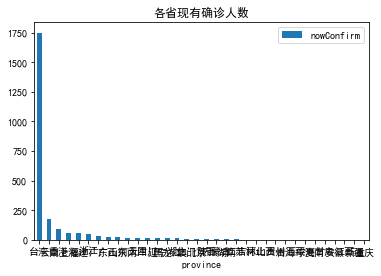

In [12]:
# 1、绘制各省现有确诊人数垂直柱状图
rcParams['font.family'] = 'simhei'
people = pd.read_excel('国内疫情.xlsx')
people.plot.bar(x='province',y='nowConfirm')

plt.xticks(rotation=360)
plt.title('各省现有确诊人数')
plt.show()

In [13]:
#2、国内各地区现有确诊人数地图
from pyecharts.globals import ChartType

(
    Map()
    .add("",[list(z) for z in zip(list(china_data["province"]), list(china_data["nowConfirm"]))], "china",is_map_symbol_show=False)
    .set_global_opts(title_opts=opts.TitleOpts(title="中国各地区总确诊人数地图"),visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
                pieces = [
                    
                        {"min": 5000 , "label": '>5000',"color": "#893448"}, #不指定 max，表示 max 为无限大
                        {"min": 1000, "max": 4999, "label": '1000-4999',"color" : "#ff585e" },
                        {"min": 500, "max": 999, "label": '500-1000',"color": "#fb8146"},
                        {"min": 101, "max": 499, "label": '101-499',"color": "#ffA500"},
                        {"min": 10, "max": 100, "label": '10-100',"color": "#ffb248"},
                        {"min": 0, "max": 9, "label": '0-9',"color" : "#fff2d1" }]))

).render_notebook()


    图中从宏观的角度可显示目前中国高原地区，西北地区确诊人数最少，台北地区确诊人数最多，南部地区的确诊人数除贵州，湖南，江西，海南省确诊人数较为中等。

In [14]:
#3、绘制全国疫情现有确诊人数饼图
from pyecharts.charts import Pie
import pyecharts.options as opts
(
    Pie(init_opts=opts.InitOpts(width='720px',height='520px'))#默认900，600
    .add(series_name='', data_pair=[list(z) for z in zip(china_data["province"], china_data["nowConfirm"])])#饼图
 
).render_notebook()

    从饼图可以更清晰地了解到各省份的确诊人数，确诊人数最多的是台湾地区，最少的是江西地区。

### 2.国际疫情态势可视化

In [15]:
#1、将各国的中文名称转换成英文名称，使用pandas中的merge方法
world_name = pd.read_excel("国家中英文对照表.xlsx")
world_data_t = pd.merge(world_data,
                        world_name,
                        left_on="country",
                        right_on="中文",
                        how="inner")

world_data_t

,country,nowConfirm,confirm,dead,heal,英文,中文
0,美国,8187367,39668541,654696,30826478,United States,美国
1,西班牙,489616,4831809,84000,4258193,Spain,西班牙
2,哥伦比亚,177312,3635835,93473,3365050,Colombia,哥伦比亚
3,法国,2166003,2405255,57671,181581,France,法国
4,秘鲁,230663,2149591,198263,1720665,Peru,秘鲁
...,...,...,...,...,...,...,...
143,伯利兹,2,2,0,0,Belize,伯利兹
144,几内亚比绍,2,2,0,0,Guinea-Bissau,几内亚比绍
145,东帝汶,1,1,0,0,Timor-Leste,东帝汶
146,巴布亚新几内亚,1,1,0,0,"Papua New Guinea,",巴布亚新几内亚


In [16]:
#2、绘制世界各国现有确诊人数地图
m2 = Map()
m2.add("", [
    list(z)
    for z in zip(list(world_data_t["英文"]), list(world_data_t["nowConfirm"]))
],
       maptype="world",
       is_map_symbol_show=False)
m2.set_global_opts(title_opts=opts.TitleOpts(title="COVID-19世界各国现有确诊人数地图"),
                   visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
                                                     pieces=[{
                                                         "min": 5000,
                                                         "label": '>5000',
                                                         "color": "#893448"
                                                     }, {
                                                         "min": 1000,
                                                         "max": 4999,
                                                         "label": '1000-4999',
                                                         "color": "#ff585e"
                                                     }, {
                                                         "min": 500,
                                                         "max": 999,
                                                         "label": '500-1000',
                                                         "color": "#fb8146"
                                                     }, {
                                                         "min": 101,
                                                         "max": 499,
                                                         "label": '101-499',
                                                         "color": "#ffA500"
                                                     }, {
                                                         "min": 10,
                                                         "max": 100,
                                                         "label": '10-100',
                                                         "color": "#ffb248"
                                                     }, {
                                                         "min": 0,
                                                         "max": 9,
                                                         "label": '0-9',
                                                         "color": "#fff2d1"
                                                     }]))
"""取消显示国家名称"""
m2.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
m2.render_notebook()

### 五、词云图

#### 1、绘制国内词云图

In [17]:
area_data = china_data.groupby("province")["nowConfirm"].sum().reset_index()
area_data.columns = ["province","confirm"]
area_data.to_csv('china.csv',index=False)

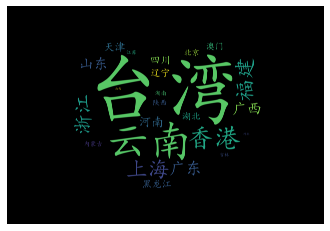

In [20]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
def draw_cloud(read_name):
    # 参数分别是指定字体、背景颜色、
    picture_road=str(r'D:\Data\jupyterNote Data\11\tp.jpeg')
    wc = WordCloud(font_path='simkai.ttf',
                   background_color="black",  # 背景颜色
                   scale=10, 
                   width=800,
                   height=600,
                   max_font_size=150,
                   #min_font_size=20,
                   mask=np.array(Image.open(picture_road)),#背景图片
                   max_words=2000,
                   random_state=42,
                  )
    fp = pd.read_csv(read_name, encoding='utf-8')
    name = list(fp.province)  # 词
    value = fp.confirm  # 词的频率
    for i in range(len(name)):
        name[i] = str(name[i])
    dic = dict(zip(name, value))  # 词频以字典形式存储
    wc.generate_from_frequencies(dic)  # 根据给定词频生成词云
    plt.imshow(wc)
    plt.axis("off")  # 不显示坐标轴
    plt.show()
    wc.to_file('china.jpeg')  # 图片命名
if __name__ == '__main__':
    draw_cloud("china.csv")

#### 2、绘制全球词云图

In [21]:
#把全球疫情数据存到一个Excel表格里面
world_data_t.to_excel("全球疫情数据表.xlsx", index=False)

In [22]:
area_data_t=world_data_t.groupby("country")["nowConfirm"].sum().reset_index()
area_data_t.columns = ["country","nowConfirm"]
area_data_t.to_csv('world.csv',index=False)

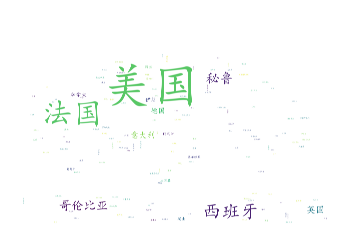

In [23]:
def draw_world_cloud(read_name):
    # 参数分别是指定字体、背景颜色、
    picture_road=str(r'D:\Data\jupyterNote Data\11\222.jpg')
    wc = WordCloud(font_path='simkai.ttf',
                   background_color="white",  # 背景颜色
                   scale=10, 
                   width=800,
                   height=600,
                   max_font_size=150,
                   #min_font_size=20,
                   mask=np.array(Image.open(picture_road)),#背景图片
                   max_words=2000,
                   random_state=42,
                  )
    fp = pd.read_csv(read_name, encoding='utf-8')
    name = list(fp.country)  # 词
    value = fp.nowConfirm  # 词的频率
    for i in range(len(name)):
        name[i] = str(name[i])
    dic = dict(zip(name, value))  # 词频以字典形式存储
    wc.generate_from_frequencies(dic)  # 根据给定词频生成词云
    plt.imshow(wc)
    plt.axis("off")  # 不显示坐标轴
    plt.show()
    wc.to_file('world.jpg')  # 图片命名
if __name__ == '__main__':
    draw_world_cloud("world.csv")

In [27]:
import pandas as pd
#这是约定俗成的写法，一般而言，大家都会写pd，当然也可以换成别的

centerSeries=pd.Series(['中国科学院','文献情报中心','大楼','北四环西路'],index=['a','b','c','d']);
# index的size同Series必须一样大，否则报错
print(centerSeries)

a     中国科学院
b    文献情报中心
c        大楼
d     北四环西路
dtype: object


In [26]:
import pandas as pd
#这是约定俗成的写法，一般而言，大家都会写pd，当然也可以换成别的

centerSeries=pd.Series(['中国科学院','文献情报中心','大楼','北四环西路']);
print(centerSeries);


0     中国科学院
1    文献情报中心
2        大楼
3     北四环西路
dtype: object


In [28]:
import pandas as pd
#这是约定俗成的写法，一般而言，大家都会写pd，当然也可以换成别的

centerSeries=pd.Series(['中国科学院','文献情报中心','大楼','北四环西路'],index=['a','b','c','d']);
# index的size同Series必须一样大，否则报错
print(centerSeries[0])#通过一维数组进行获取数据
print(centerSeries[1])
print(centerSeries['c'])#通过标识index获取数据
print(centerSeries['d'])import pandas as pd
# 简单的DataFrame制作
# 字典格式的数据
data={'name':['国科图','国科图','文献情报中心','文献情报中心'],
     'year':['2012','2013','2014','2015'],
     'local':['北四环西路','北四环西路','北四环西路','北四环西路'],
     'student':['甲','乙','丙','丁']}
centerDF=pd.DataFrame(data);
centerDF #同样，默认的index是数字表示，而且它的列名也是按字母顺序排序的

中国科学院
文献情报中心
大楼
北四环西路


In [29]:
import pandas as pd
# 简单的DataFrame制作
# 字典格式的数据
data={'name':['国科图','国科图','文献情报中心','文献情报中心'],
     'year':['2012','2013','2014','2015'],
     'local':['北四环西路','北四环西路','北四环西路','北四环西路'],
     'student':['甲','乙','丙','丁']}
centerDF=pd.DataFrame(data);
centerDF #同样，默认的index是数字表示，而且它的列名也是按字母顺序排序的

,name,year,local,student
0,国科图,2012,北四环西路,甲
1,国科图,2013,北四环西路,乙
2,文献情报中心,2014,北四环西路,丙
3,文献情报中心,2015,北四环西路,丁


In [31]:
centerDF=pd.DataFrame(data,columns=['year','name','local','student'])
centerDF

,year,name,local,student
0,2012,国科图,北四环西路,甲
1,2013,国科图,北四环西路,乙
2,2014,文献情报中心,北四环西路,丙
3,2015,文献情报中心,北四环西路,丁


In [32]:
centerDF=pd.DataFrame(data,columns=['year','name','local','student'],index=['a','b','c','d'])
centerDF

,year,name,local,student
a,2012,国科图,北四环西路,甲
b,2013,国科图,北四环西路,乙
c,2014,文献情报中心,北四环西路,丙
d,2015,文献情报中心,北四环西路,丁


In [33]:
import pandas as pd
# 简单的DataFrame制作
# 字典格式的数据
data={'name':['国科图','国科图','文献情报中心','文献情报中心'],
     'year':['2012','2013','2014','2015'],
     'local':['北四环西路','北四环西路','北四环西路','北四环西路'],
     'student':['甲','乙','丙','丁']}
centerDF=pd.DataFrame(data,columns=['year','name','local','student'],index=['a','b','c','d']);
print(centerDF['name']);
print()
print('列的类型：',type(centerDF['name']))
print();
print(centerDF['year'])import pandas as pd
# 简单的DataFrame制作
# 字典格式的数据
data={'name':['国科图','国科图','文献情报中心','文献情报中心'],
     'year':['2012','2013','2014','2015'],
     'local':['北四环西路','北四环西路','北四环西路','北四环西路'],
     'student':['甲','乙','丙','丁']}
centerDF=pd.DataFrame(data,columns=['year','name','local','student'],index=['a','b','c','d']);
print(centerDF.loc['a']);
print()
print('行的类型：',type(centerDF.loc['a']))

a       国科图
b       国科图
c    文献情报中心
d    文献情报中心
Name: name, dtype: object

列的类型： <class 'pandas.core.series.Series'>

a    2012
b    2013
c    2014
d    2015
Name: year, dtype: object


In [34]:
import pandas as pd
# 简单的DataFrame制作
# 字典格式的数据
data={'name':['国科图','国科图','文献情报中心','文献情报中心'],
     'year':['2012','2013','2014','2015'],
     'local':['北四环西路','北四环西路','北四环西路','北四环西路'],
     'student':['甲','乙','丙','丁']}
centerDF=pd.DataFrame(data,columns=['year','name','local','student'],index=['a','b','c','d']);
print(centerDF.loc['a']);
print()
print('行的类型：',type(centerDF.loc['a']))

year        2012
name         国科图
local      北四环西路
student        甲
Name: a, dtype: object

行的类型： <class 'pandas.core.series.Series'>


In [4]:
import pyecharts
pyecharts.__version__

'1.9.0'

In [16]:
from pyecharts.chart import Bar
from pyecharts import options as opts

ModuleNotFoundError: No module named 'pyecharts.chart'

In [2]:
from pyecharts.chart import Bar
from pyecharts import options as opts
x = ['Python数据可视化库 seaborn', 'Python数据可视化库 plotly', 'Python数据可视化 matplotlib']
y1 = [1140, 550, 270]
y2 = [570, 1340, 1370]
bar = Bar() # 实例化对象

# xaxis_data : 要添加的X轴数据
bar.add_xaxis(xaxis_data=x)  # x轴坐标的数据

# yaxis_data : 添加的x轴数据,series_name : 图例的名字
bar.add_yaxis(yaxis_data=y1, series_name='平台-A')

bar.add_yaxis(yaxis_data=y2, series_name='平台-B')

# 设置bar的全局配置项 
bar.set_global_opts(title_opts=opts.TitleOpts(title='Small-J绘制的平台'))

bar.render(path='./HTML/first_bar.html')  # 绘制图形。path为指定路径，生成HTML文件的一个路径


ModuleNotFoundError: No module named 'pyecharts.chart'

In [17]:
import pandas as pd
data=pd.read_csv('test_datasets_finally.csv',delimiter='#',header=0)
df=pd.DataFrame(data)
print(df.shape)
print(df.loc[:,'area'].nunique())#地区数
area=df.loc[:,'area'].value_counts()#每个地区数量
#area=pd.DataFrame(area)
print(area.shape)
print(area.head())


FileNotFoundError: [Errno 2] No such file or directory: 'test_datasets_finally.csv'

In [24]:
from pyecharts.charts import Map
from pyecharts.engine import create_default_environment

ModuleNotFoundError: No module named 'pyecharts.engine'

In [21]:

from pyecharts.charts import Map
from pyecharts.engine import create_default_environment
value = [155, 10, 66, 78, 33, 80, 190, 53, 49.6]
attr = [
    "福建", "山东", "北京", "上海", "甘肃", "新疆", "河南", "广西", "西藏"
    ]
#map = Map("name_map -> dict定义地图名称", width=1200, height=600)
map = Map("Map 结合 VisualMap 示例", width=1200, height=600)
map.add(
    "",     #name -> str图例名称
    attr,    #attr -> list属性名称
    value,    #value -> list属性所对应的值
    maptype="china",    #maptype -> str   地图类型。 从 v0.3.2+ 起，地图已经变为扩展包，支持全国省份，全国城市，全国区县，全球国家等地图 
    is_label_show=True,   #显示各区域名称
    #is_map_symbol_show=True,   #is_map_symbol_show -> bool  是否显示地图标记红点，默认为 True。
    is_map_symbol_show=False,    #设置 is_map_symbol_show=False 取消显示标记红点
    #is_roam -> bool/str 是否开启鼠标缩放和平移漫游。默认为 True 如果只想要开启缩放或者平移，可以设置成'scale'或者'move'。设置成 True 为都开启
    is_roam=True,
    #Visualmap 使用
    is_visualmap=True,
    visual_text_color="#000",
    
    #Note： 可以按右边的下载按钮将图片下载到本地，如果想要提供更多实用工具按钮，请在 add() 中设置 is_more_utils 为 True
    #is_more_utils=True
)
#map.render()#输出默认       render.html
map.render(path='./Map 结合 VisualMap 示例.html')


ModuleNotFoundError: No module named 'pyecharts.engine'

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

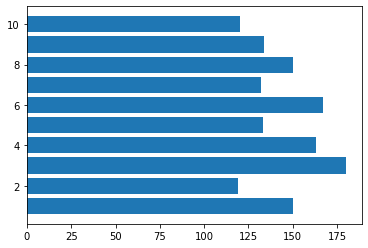

In [29]:
plt.barh(range(1, 11), np.random.randint(100, 200, 10))

([<matplotlib.patches.Wedge at 0x1c15fc88310>,
 [Text(-0.3399186987098806, 1.0461621663333949, 'A部门'),
  Text(-1.0461621742897658, 0.3399186742226879, 'B部门'),
  Text(-0.33991862524830174, -1.0461621902025062, 'C部门'),
  Text(1.0461621265515308, 0.3399188211458417, 'D部门')])

D:\App\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37096 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\App\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\App\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 37096 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\App\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38376 missing from current font.
  font.set_text(s, 0, flags=flags)


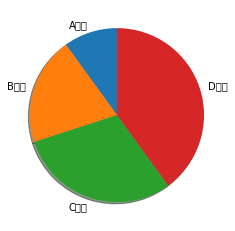

In [30]:
# 饼图适合于表示比例大小。（数量不宜过多，否则会显得凌乱）
# plt.pie([10, 20, 30, 40], labels=["A部门", "B部门", "C部门", "D部门"], explode=[0, 0, 0, 0.5], colors=["r", "g", "b", "y"])
# plt.pie([10, 20, 30, 40], labels=["A部门", "B部门", "C部门", "D部门"], autopct="%.2f", counterclock=False)
plt.pie([10, 20, 30, 40], labels=["A部门", "B部门", "C部门", "D部门"], startangle=90, shadow=True)
